# Обучим gpt2 на данных

In [21]:
from transformers import GPT2Tokenizer, TFGPT2Model
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer

In [22]:
device = 'cpu' if not torch.cuda.is_available() else 'cuda'
device

'cuda'

In [30]:
model = AutoModelForCausalLM.from_pretrained("gpt2", torch_dtype=torch.float16)
model.to(device)

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

In [26]:
tokenizer = AutoTokenizer.from_pretrained("gpt2")

In [40]:
prompt = "Hello, tell me how reconstruct you for predict volume on defu crypto market"

In [41]:
model_inputs = tokenizer([prompt], return_tensors="pt").to(device)

In [42]:
generated_ids = model.generate(**model_inputs, max_new_tokens=1000, do_sample=True)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [47]:
print(tokenizer.batch_decode(generated_ids)[0])

Hello, tell me how reconstruct you for predict volume on defu crypto market and for time series in crypto.

The real question we need are whether volume and price (for time series, period of time) for each and any crypto.

There are many ways that they could come from various sources.

It could come through a network, by running a web site and by simply running an application.

Any of these mechanisms could be built on blockchain and a blockchain can be used as a proof of work in a cryptographic proof.

It might be possible to build a whole business, like a business server for storing all transactions of people's transactions. In that model, it could be added into an existing blockchain as a proof of address.

It might also come through a blockchain and maybe a blockchain could contain a public key, which could be used to encrypt or re-ignite the public keys.

In this way even if a proof of address is established, it can also provide data to be stored on the network as proof.

Here is 

# Testing crio
 

In [2]:
import pandas as pd
import numpy as np
import json
import typing as tp
from tqdm.notebook import tqdm

In [3]:
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
import Code.Dataloader as dataloader
import Code.Logger as logs

import importlib
importlib.reload(dataloader)
importlib.reload(logs);

In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
start_ind = int(1e7)
transactions = dataloader.GetTransactionsByInd(range(start_ind, start_ind + 150), logger_fake='logger_loader')


  0%|          | 0/150 [00:00<?, ?it/s]

Write at logger: logs/logger_loader.log


In [29]:
last_ind = int(2e7 + 1e6)
size = 100
transactions = dataloader.GetTransactionsByInd(range(last_ind, last_ind - size, -1), logger_fake='logger_loader')
df_to_for_predict = transactions.loc[:, dataloader.useful_columns]

  0%|          | 0/100 [00:00<?, ?it/s]

Write at logger: logs/logger_loader.log


In [7]:
last_ind = int(2e7 + 1e6)
size = 4000
transactions = dataloader.GetTransactionsByInd(range(last_ind, last_ind - size, -1), logger_fake='logger_loader')
df_to_for_predict = transactions.loc[:, dataloader.useful_columns]

  0%|          | 0/4000 [00:00<?, ?it/s]

Write at logger: logs/logger_loader.log


In [8]:
df_to_for_predict.head(5)

,timestamp,from,to,nonce,transactionIndex,type,value
0,2024-10-19 13:45:47,1153599334270540825116534873609702723577695361442,360626852303502211918984836330587137786732780243,322,0,2,0.0
1,2024-10-19 13:45:47,97840791646144403883154721377920130019782939081,198711195697986279793524651792786476427874121482,39832,1,0,0.0
2,2024-10-19 13:45:47,1251277645027622750093042385120322446303808392872,331497450208276499761800402457369371151716489247,2196,2,2,0.3
3,2024-10-19 13:45:47,280854366049012869853841418439870510546273224552,466869609986913014237362913113971488315126327935,9202,3,2,0.0
4,2024-10-19 13:45:47,1228251626684428057107246147496081400699385431934,292072159098574616991920578893626132055744093257,13,4,2,0.0


In [9]:
df_to_for_predict

,timestamp,from,to,nonce,transactionIndex,type,value
0,2024-10-19 13:45:47,1153599334270540825116534873609702723577695361442,360626852303502211918984836330587137786732780243,322,0,2,0.000000
1,2024-10-19 13:45:47,97840791646144403883154721377920130019782939081,198711195697986279793524651792786476427874121482,39832,1,0,0.000000
2,2024-10-19 13:45:47,1251277645027622750093042385120322446303808392872,331497450208276499761800402457369371151716489247,2196,2,2,0.300000
3,2024-10-19 13:45:47,280854366049012869853841418439870510546273224552,466869609986913014237362913113971488315126327935,9202,3,2,0.000000
4,2024-10-19 13:45:47,1228251626684428057107246147496081400699385431934,292072159098574616991920578893626132055744093257,13,4,2,0.000000
...,...,...,...,...,...,...,...
681514,2024-10-19 00:21:59,837865433964833422891484023321442669492373105524,191584147722255072433242915595244332879196446170,1899,142,2,0.051700
681515,2024-10-19 00:21:59,1341982172376672149206164609929775747728328435945,220055792843139045561585801015232763926786332487,739,143,2,1.070000
681516,2024-10-19 00:21:59,1341982172376672149206164609929775747728328435945,1035999569602475065091882782987322669415773824368,740,144,2,3.500000
681517,2024-10-19 00:21:59,797426624118554943717853765742630966158852298132,822577011310822776922505111099855628493985631924,129607,145,2,0.011111


In [10]:
len(df_to_for_predict['from'].value_counts())

270513

In [11]:
df_to_for_predict['to'].value_counts()[1038152369971993893212000844348416056966454179089]

1207

In [12]:
df_to_for_predict['from'].value_counts()[:9000]

1038152369971993893212000844348416056966454179089    3714
994429647842349956202558210651765677140457008659     3309
400789962006340549852869924061523720861624538968     3042
1419341696234228896098404685584097748908379122240    3018
1410425392916258954824992095144275378304893311983    2838
                                                     ... 
927206689739642977492155253950622055263156919729        8
1186323206451224481039780815181057901341565349240       8
23686111723495434729121042396412173120871091657         8
381015429815939808538946704394134465062915361066        8
269008611119245695728519423589400739684769836987        8
Name: from, Length: 9000, dtype: int64

In [13]:
# grouped = df_to_for_predict.groupby('from').value.mean()
# for name, cnt in df_to_for_predict['from'].value_counts()[:30].items():
#     print(f"cnt: {cnt}, mean volume: {grouped[name]}: ")

In [14]:
df_to_for_predict.groupby('from').value.mean()[1038152369971993893212000844348416056966454179089]

1.6485877701251912

In [15]:
mean_sell = df_to_for_predict.groupby('from').value.mean()

In [16]:
top_sellers = df_to_for_predict['from'].value_counts().values
top_sellers

array([3714, 3309, 3042, ...,    1,    1,    1])

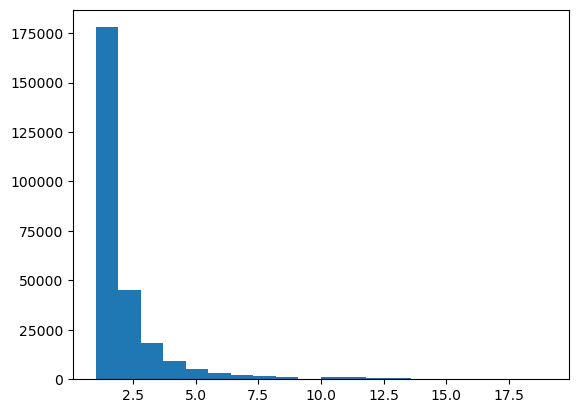

In [17]:
plt.hist(top_sellers[top_sellers < 20], bins=20);

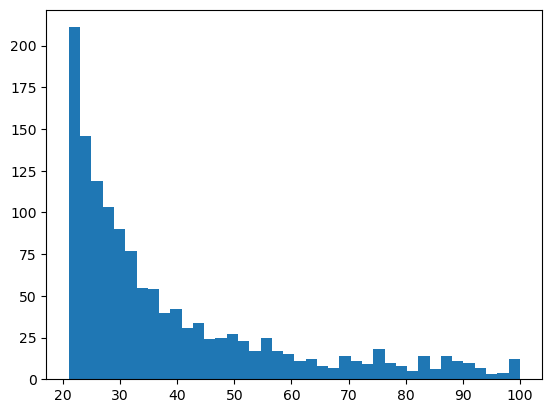

In [18]:
plt.hist(top_sellers[(top_sellers > 20) & (top_sellers <= 100)], bins=40);

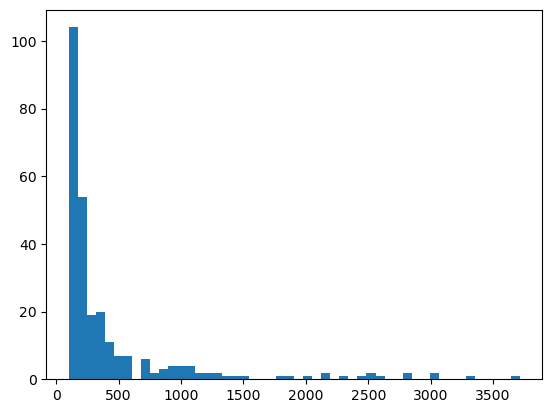

In [19]:
plt.hist(top_sellers[top_sellers > 100], bins=50);

In [20]:
# pd.DataFrame(
#     [df_to_for_predict.loc[df_to_for_predict['from'] == ind, 'value'].describe().values.reshape(8) for ind in top_sellers],
#     index=top_sellers,
#     columns=df_to_for_predict.loc[df_to_for_predict['from'] == top_sellers[0], 'value'].describe().index
#     )


# Bert!!!

In [21]:
df_to_for_predict.columns

Index(['timestamp', 'from', 'to', 'nonce', 'transactionIndex', 'type',
       'value'],
      dtype='object')

In [22]:
df_raw = df_to_for_predict.values
IND_FROM = df_to_for_predict.columns.get_loc('from')
IND_TO = df_to_for_predict.columns.get_loc('to')
IND_NONCE = df_to_for_predict.columns.get_loc('nonce')
IND_INDEX = df_to_for_predict.columns.get_loc('transactionIndex')
IND_TYPE = df_to_for_predict.columns.get_loc('type')
IND_VALUE = df_to_for_predict.columns.get_loc('value')

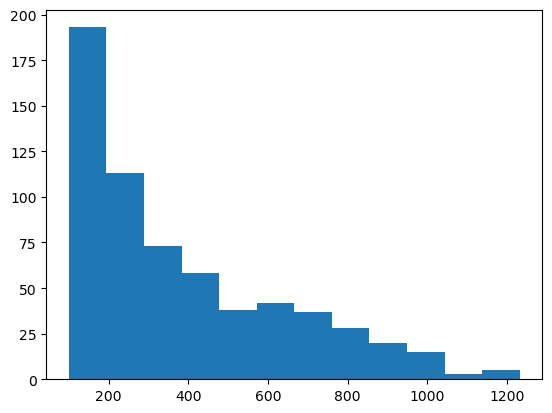

In [23]:
plt.hist(df_raw[:, IND_VALUE][
    (df_raw[:, IND_VALUE] > 100) & \
    (df_raw[:, IND_VALUE] < 1250)
        ], bins=12);

In [24]:
import datetime
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from transformers import BertConfig, BertModel
import numpy as np

2024-10-27 23:29:56.830897: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-27 23:29:56.862483: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-27 23:29:56.880385: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-27 23:29:56.885382: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-27 23:29:56.910401: I tensorflow/core/platform/cpu_feature_guar

In [254]:
def extract_time_features(timestamps):
    hours = [timestamp.hour for timestamp in timestamps]
    days_of_week = [timestamp.weekday() for timestamp in timestamps]
    days_of_month = [timestamp.day for timestamp in timestamps]
    months = [timestamp.month for timestamp in timestamps]
    years = [timestamp.year for timestamp in timestamps]
    minutes = [timestamp.minute for timestamp in timestamps]
    seconds = [timestamp.second for timestamp in timestamps]
    return [seconds, minutes, hours, days_of_week, days_of_month, months, years, [timestamp.timestamp() for timestamp in timestamps]]

class TransactionDataset(Dataset):
    def __init__(self, data, known_address, sample_len):
        self.data = data
        self.known_address = known_address
        self.sample_len = sample_len

    def __len__(self):
        return len(self.data) // self.sample_len

    def __getitem__(self, idx):
        sample = self.data[idx * self.sample_len: (idx + 1) * self.sample_len]
        time_features = extract_time_features(sample[:, 0])
        from_address = sample[:, IND_FROM]
        to_address = sample[:, IND_TO]
        from_ind = np.full_like(from_address, len(self.known_address), dtype=int)
        to_ind = np.full_like(to_address, len(self.known_address), dtype=int)

        for ind, addr in enumerate(self.known_address):
            from_ind[from_address == addr] = ind
            to_ind[to_address == addr] = ind

        numeric_features = [sample[:, IND_NONCE], sample[:, IND_INDEX], sample[:, IND_TYPE]]
        numeric_features = torch.tensor(numeric_features, dtype=torch.float)
        # input_features = torch.cat((torch.tensor([from_address, to_address], dtype=torch.float), numeric_features), dim=0)
        return {
            'numeric_features': numeric_features.T,
            'from_address': torch.tensor(from_ind, dtype=torch.long).T,
            'to_address': torch.tensor(to_ind, dtype=torch.long).T,
            'time_features': torch.tensor(time_features, dtype=torch.float).T,
            'value': torch.tensor(sample[:, IND_VALUE].astype(float), dtype=torch.float)
        }

In [288]:
class BertForTransactionRegression(nn.Module):
    def __init__(self, known_address_len, emb_size=64):
        super(BertForTransactionRegression, self).__init__()
        config = BertConfig()
        config.hidden_size = emb_size * 3 + 3  # Adjust hidden size to match the input dimension
        self.bert = BertModel(config)
        self.address_embedding = nn.Embedding(num_embeddings=known_address_len + 1, embedding_dim=emb_size)
        self.time_embedding = nn.Linear(8, emb_size)  # Embedding layer for time features
        self.linear = nn.Linear(config.hidden_size, 1)
    
    def forward(self, numeric_features, from_address, to_address, time_features):
        from_emb = self.address_embedding(from_address)
        to_emb = self.address_embedding(to_address)

        time_emb = self.time_embedding(time_features)
        # for x in [numeric_features, from_emb, to_emb, time_emb]:
        #     print(x.shape)
        features = torch.cat([numeric_features, from_emb, to_emb, time_emb], dim=-1)
        # print(features.shape)
        # print(features.shape)
        # print(features.shape)
        bert_output = self.bert(inputs_embeds=features).last_hidden_state
        # pooled_output = torch.mean(bert_output, dim=1)
        value_pred = self.linear(bert_output)
        return value_pred.squeeze(-1)

In [328]:
def train_model(model, train_loader, num_epochs=5, learning_rate=1e-5, device='cuda'):
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)
    loss_fn = nn.MSELoss()
    model.train()
    for epoch in range(num_epochs):
        total_loss = 0
        for batch in tqdm(train_loader):
            optimizer.zero_grad()
            outputs = model(
                numeric_features=batch['numeric_features'].to(device),
                from_address=batch['from_address'].to(device),
                to_address=batch['to_address'].to(device),
                time_features=batch['time_features'].to(device)
            )
            loss = loss_fn(outputs, torch.log(batch['value'].to(device) + 0.01))
            total_loss += loss.cpu().detach().item()
            loss.backward()
            optimizer.step()
        scheduler.step()
        avg_loss = total_loss / len(train_loader)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')

In [318]:
cnt_known_address = 200
known_address = pd.concat([df_to_for_predict['to'], df_to_for_predict['from']]).value_counts()[:cnt_known_address].keys()

In [343]:
dataset = TransactionDataset(df_raw, list(known_address), 100)
for name, value in dataset[1].items():
    print(f"{name}: {value.shape}")
# dataset[1]

numeric_features: torch.Size([100, 3])
from_address: torch.Size([100])
to_address: torch.Size([100])
time_features: torch.Size([100, 8])
value: torch.Size([100])


In [344]:
device = 'cuda'

In [345]:
model = BertForTransactionRegression(len(known_address), 63).to(device)

In [346]:
train_batch_gen = torch.utils.data.DataLoader(dataset, 
                                              batch_size=16,
                                              shuffle=True,
                                              num_workers=12)

In [347]:
train_model(model, train_batch_gen, 30, 1e-2)

  0%|          | 0/426 [00:00<?, ?it/s]

Epoch [1/30], Loss: 2.1790


  0%|          | 0/426 [00:00<?, ?it/s]

Epoch [2/30], Loss: 1.8688


  0%|          | 0/426 [00:00<?, ?it/s]

Epoch [3/30], Loss: 1.8694


  0%|          | 0/426 [00:00<?, ?it/s]

Epoch [4/30], Loss: 1.8678


  0%|          | 0/426 [00:00<?, ?it/s]

Epoch [5/30], Loss: 1.8681


  0%|          | 0/426 [00:00<?, ?it/s]

Epoch [6/30], Loss: 1.8580


  0%|          | 0/426 [00:00<?, ?it/s]

Epoch [7/30], Loss: 1.8588


  0%|          | 0/426 [00:00<?, ?it/s]

Epoch [8/30], Loss: 1.8587


  0%|          | 0/426 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [348]:
it = iter(train_batch_gen)

In [349]:
batch = next(it)

In [350]:
with torch.no_grad():
    outputs = model(
        numeric_features=batch['numeric_features'].to(device),
        from_address=batch['from_address'].to(device),
        to_address=batch['to_address'].to(device),
        time_features=batch['time_features'].to(device)
    )

In [351]:
batch['value']

tensor([[0.0000e+00, 5.0000e-03, 2.5763e-01,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 5.1194e-03,  ..., 2.2603e-03, 1.4321e-02,
         0.0000e+00],
        [2.8174e-03, 2.8174e-03, 2.8174e-03,  ..., 3.1930e+01, 0.0000e+00,
         0.0000e+00],
        ...,
        [0.0000e+00, 0.0000e+00, 4.3800e-02,  ..., 2.4270e-13, 8.9700e-15,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 4.0000e-01, 0.0000e+00,
         0.0000e+00],
        [9.4311e-03, 0.0000e+00, 2.0000e-03,  ..., 0.0000e+00, 0.0000e+00,
         1.6838e-03]])

In [355]:
torch.exp(outputs)

tensor([[0.0197, 0.0221, 0.0226,  ..., 0.0204, 0.0199, 0.0186],
        [0.0187, 0.0178, 0.0205,  ..., 0.0218, 0.0205, 0.0208],
        [0.0193, 0.0196, 0.0190,  ..., 0.0189, 0.0195, 0.0190],
        ...,
        [0.0195, 0.0196, 0.0202,  ..., 0.0182, 0.0211, 0.0215],
        [0.0187, 0.0200, 0.0197,  ..., 0.0173, 0.0197, 0.0184],
        [0.0190, 0.0196, 0.0197,  ..., 0.0191, 0.0181, 0.0205]],
       device='cuda:0')

(array([6.81491e+05, 1.60000e+01, 7.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 2.00000e+00, 1.00000e+00, 1.00000e+00]),
 array([0.0, 1261.269560509567, 2522.539121019134, 3783.8086815287015,
        5045.078242038268, 6306.347802547835, 7567.617363057403,
        8828.88692356697, 10090.156484076537, 11351.426044586104,
        12612.69560509567], dtype=object),
 <BarContainer object of 10 artists>)

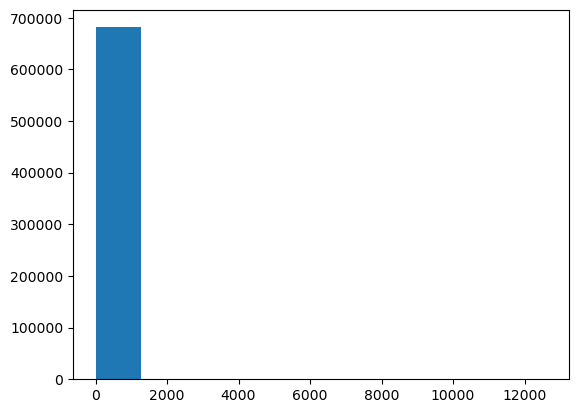

In [358]:
plt.hist(df_raw[:, IND_VALUE])